In [1]:
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from thalamus_merfish_analysis import abc_load as abc
from thalamus_merfish_analysis import ccf_polygons as cshapes
from thalamus_merfish_analysis import ccf_plots as cplots

# from colorcet import glasbey
import scanpy as sc

%matplotlib inline

# Load abc data

In [2]:
adata = abc.load_adata_thalamus(version='20230830', transform='log2', 
                       subset_to_TH_ZI=True,
                       flip_y=True, with_metadata=True, with_colors=True)
_CIRRO_COLUMNS = {
    'x':'cirro_x',
    'y':'cirro_y',
    'x_section':'cirro_x',
    'y_section':'cirro_y',
    'brain_section_label':'section',
    'parcellation_substructure':'CCF_acronym'
}
adata.obs = adata.obs.rename(columns=_CIRRO_COLUMNS)

/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [4]:
# filter out non-neurons, midbrain neurons
adata = abc.filter_adata_by_class(adata, filter_nonneuronal=True, 
                                  filter_midbrain=True)

/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [5]:
adata

View of AnnData object with n_obs × n_vars = 81074 × 550
    obs: 'brain_section_label', 'CCF_acronym', 'average_correlation_score', 'cirro_x', 'cirro_y', 'class', 'class_color', 'cluster', 'cluster_alias', 'cluster_color', 'donor_genotype', 'donor_label', 'donor_sex', 'feature_matrix_label', 'neurotransmitter', 'neurotransmitter_color', 'parcellation_category', 'parcellation_category_color', 'parcellation_division', 'parcellation_division_color', 'parcellation_index', 'parcellation_organ', 'parcellation_organ_color', 'parcellation_structure', 'parcellation_structure_color', 'parcellation_substructure_color', 'section', 'subclass', 'subclass_color', 'supertype', 'supertype_color', 'x_ccf', 'x_reconstructed', 'y_ccf', 'y_reconstructed', 'z_ccf', 'z_reconstructed', 'z_section'
    var: 'gene_symbol', 'transcript_identifier'
    uns: 'accessed_on', 'src', 'counts_transform'

# plotting function(s)

In [48]:
import anndata as ad
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.lines import Line2D
%matplotlib inline

def plot_dataset(adata, column='class', z_sections=None, legend=True):
    
    cell_df = adata.obs

    # define legend elements for the column colors
    color_col = column+'_color'
    categories = cell_df[column].unique()
    cat_color_mapping = dict(zip(categories, cell_df[color_col].unique()))
    # sort the dict & the categories list by category
    cat_color_mapping = dict(sorted(cat_color_mapping.items()))
    categories = sorted(categories)
    legend_elements = [Line2D([0], [0], 
                              lw=0, marker='o', markersize=10,
                              markerfacecolor=cat_color_mapping[cat],
                              color=cat_color_mapping[cat], 
                              label=cat) 
                       for cat in cat_color_mapping]
    
    if z_sections==None:
        z_sections = sorted(cell_df['z_reconstructed'].unique())
    
    n_col = 1
    n_row = int(np.ceil(len(z_sections) / n_col))
    fig, axes = plt.subplots(n_row, n_col, figsize=(10,20))
    axes = axes.ravel()

    # x_min = 2.5; x_max = 8.5; y_min = 7.5; y_max = 4

    for i, sec in enumerate(z_sections):
        ax = axes[i]

        curr_sec_cell_df = cell_df[(cell_df['z_reconstructed']>=sec)
                                   & (cell_df['z_reconstructed']<(sec+0.1))]

        sc = ax.scatter(curr_sec_cell_df['x_reconstructed'], curr_sec_cell_df['y_reconstructed'],
                        color=curr_sec_cell_df[column+'_color'],
                        s=7, marker='.', zorder=1)
        ax.set_title('z='+str(sec))

        # ax.set_xlim((x_min,x_max))
        # ax.set_ylim((y_min,y_max))
        ax.set_xlabel('x_reconstructed')
        ax.set_ylabel('y_reconstructed')
        ax.axis('equal')
        ax.axis('off')
        # ax.set_xticks([])
        # ax.set_yticks([])

        if legend & (i==3):
            ax.legend(legend_elements, categories, title='class', 
                      loc='center left', bbox_to_anchor=(1.1,0.5))

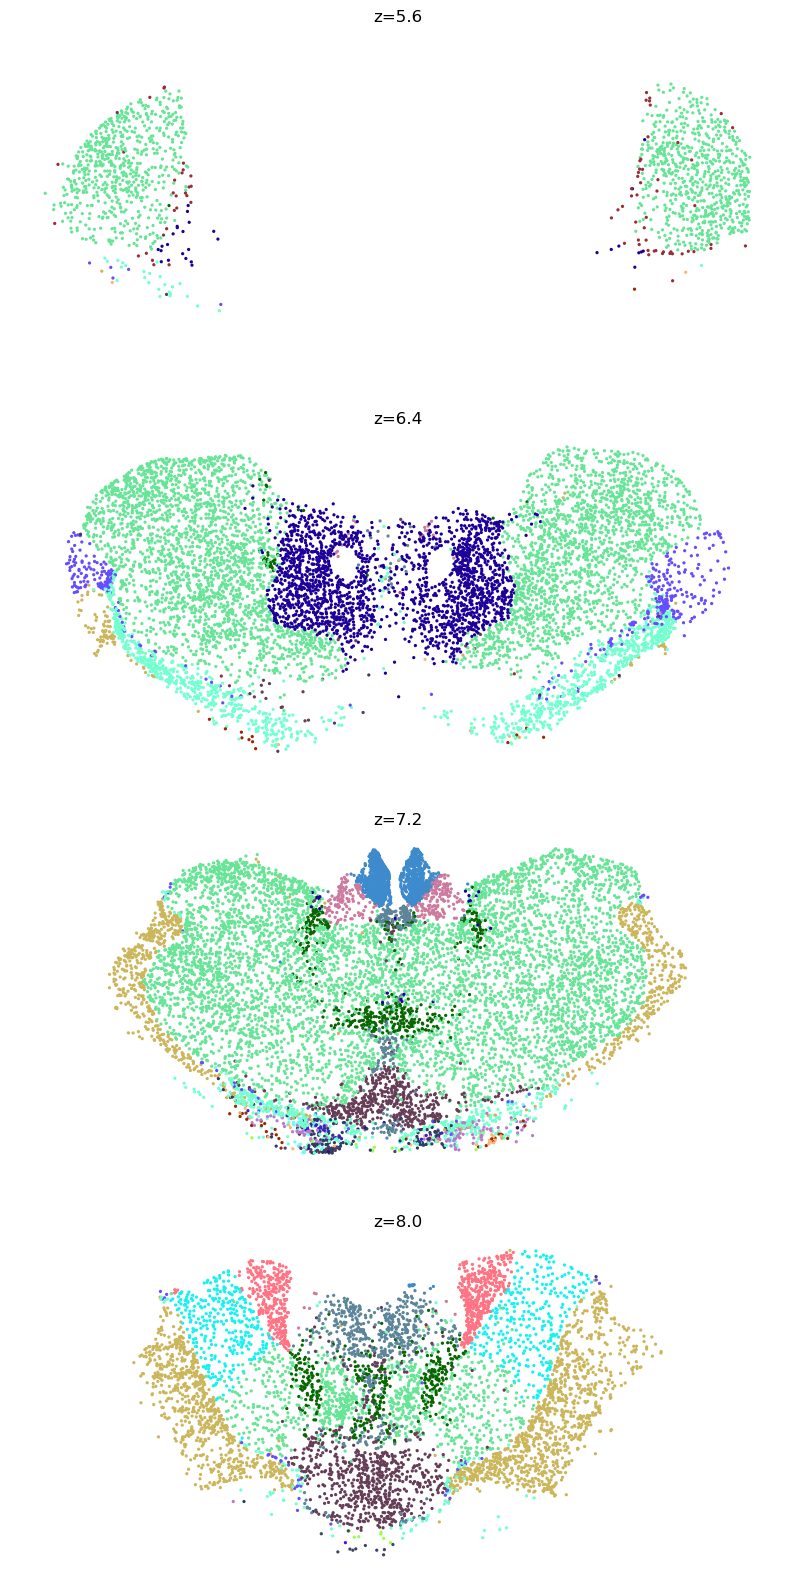

In [52]:
sections_3 = [6.4, 7.2, 8.0]
sections_4 = [5.6, 6.4, 7.2, 8.0]
plot_dataset(adata, column='subclass', z_sections=sections_4, legend=False)

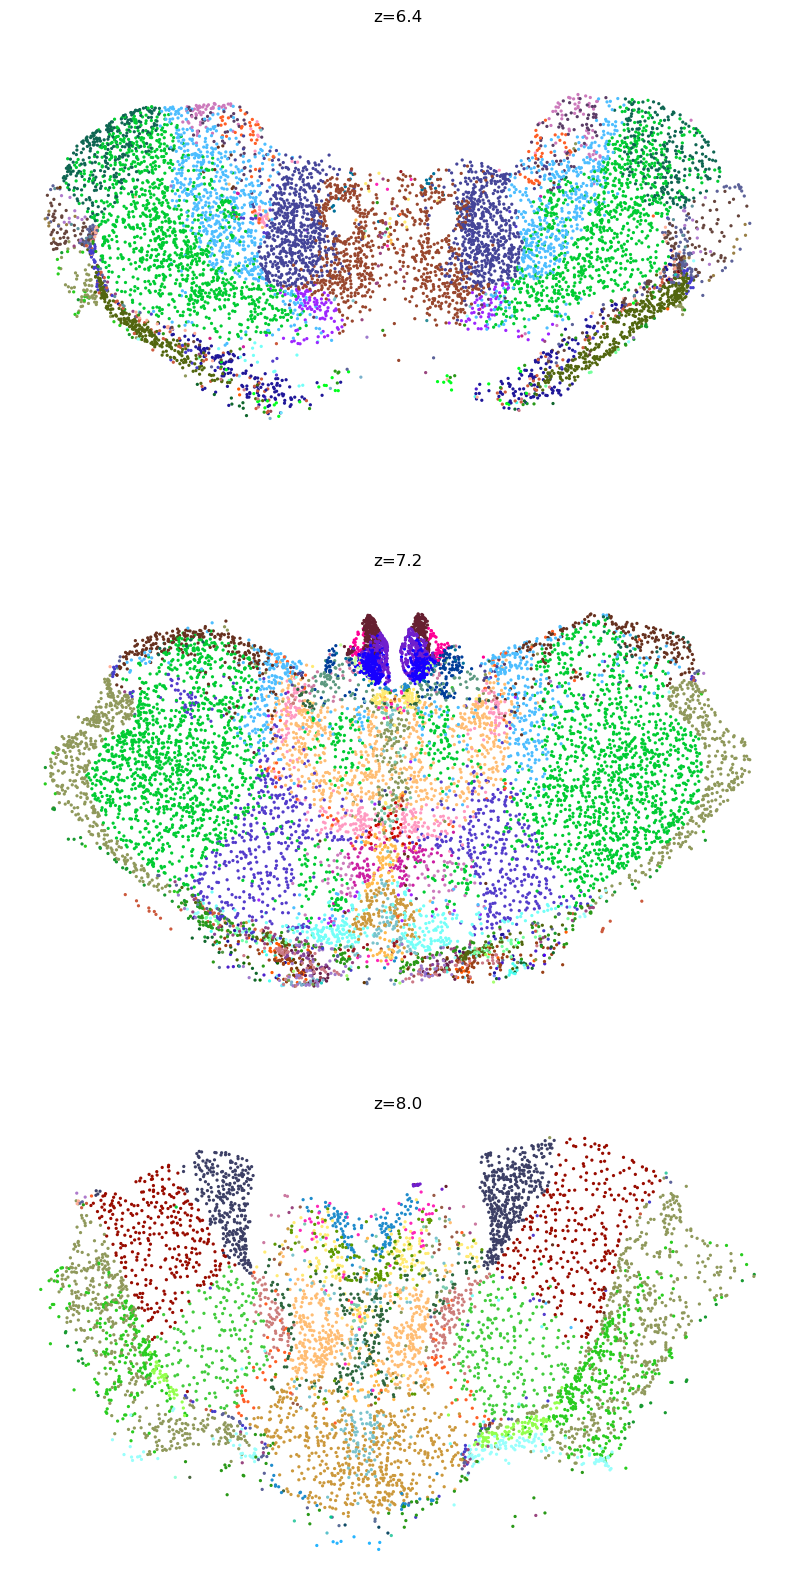

In [49]:
plot_dataset(adata, column='supertype', z_sections=sections_3, legend=False)

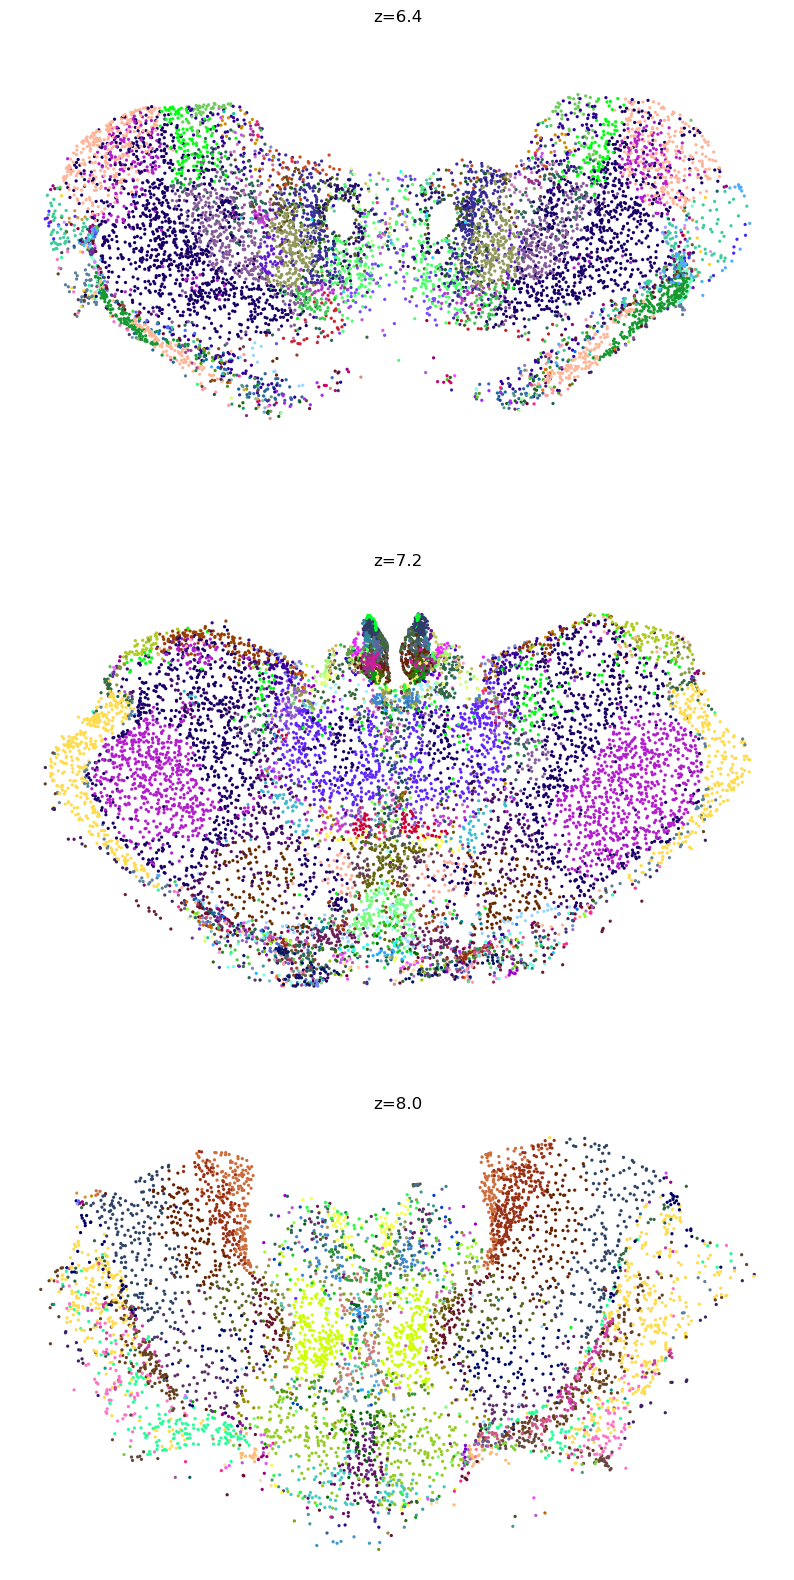

In [50]:
plot_dataset(adata, column='cluster', z_sections=sections_3, legend=False)